In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rm
from scipy.stats import norm
import itertools
import matplotlib.patches as mpatches

# Stochastic Processes and Applications

## Author: Stefan Panev

### Abstract
This notebook is a basic introduction into Stochastic Processes. It is meant for the general reader that is not very math savvy, like the course participants in the Math Concepts for Developers in SoftUni. 
<br>
There is a basic definition. Some examples of the most popular types of processes like Random Walk, Brownian Motion or Weiner Process, Poisson Process and Markov chains have been given. Their basic characteristics and examples for some possible applications are stated. For all the examples there are simulations in Python, some are visualized.
<br>
The following packages have been used:
<br>
1. nympy
<br>
2. matplotlib.pyplot
<br>
3. random
<br>
4. scipy.stats
<br>
5. itertools
<br>
6. matplotlib.patches

## Table of Contents:
* [Introduction](#first-bullet)
* [Random Walk](#second-bullet)
* [Brownian Motion or Wiener Process](#third-bullet)
* [Poisson Process](#fourth-bullet)
* [Markov Chains](#fifth-bullet)
* [Conclusion](#sixth-bullet)
* [References](#seventh-bullet)

### Introduction
A Stochastic Process is a collection of random variables over a period of time. It can be either discrete or continuous type. Techniques from calculus and probability theory are used to study the processes. There are numerous kids of stochastic processes. Several kinds of Stochastic processes are going to be given as an example in this notebook.
<br>
Lets define the stochastic process as a collection of random variables in defined on a common probability space $$(\Omega, \mathcal{F}, P)$$
,where omega is the the sample space or all the possible outcomes, mathematical F is the sigma-algebra where each set contains zero or several possible outcomes and P is the probability for the realization of the outcomes.
<br>
We define a function with an index t (representing the time) that maps a variable from the set T to a random variable from the state space S or: $$X_{t} : T \to S$$



### Random Walk
The first basic process we will look at is the random walk. It is defined as the path created by the steps which have no rule determining their development. The term 'random walk' was coined by the mathematician Karl Pearson (1857 - 1936) in 1905. The process can either be represented as one or several dimensions.
<br>
There are numerous applications in finance for modeling stocks and price movements (for further reading https://www.investopedia.com/terms/r/randomwalktheory.asp), the net worth of a gambler, movement of people in the market (such as some agent based modeling), movements of molecules and particles or changes in gene in the genome.
<br>
There are different kinds of random walks, if the steps follow the normal distribution it is said that it is a gaussian type. Other variants of a random walk are self-interacting walks, correlated walks, maximal entropy random walk and others.


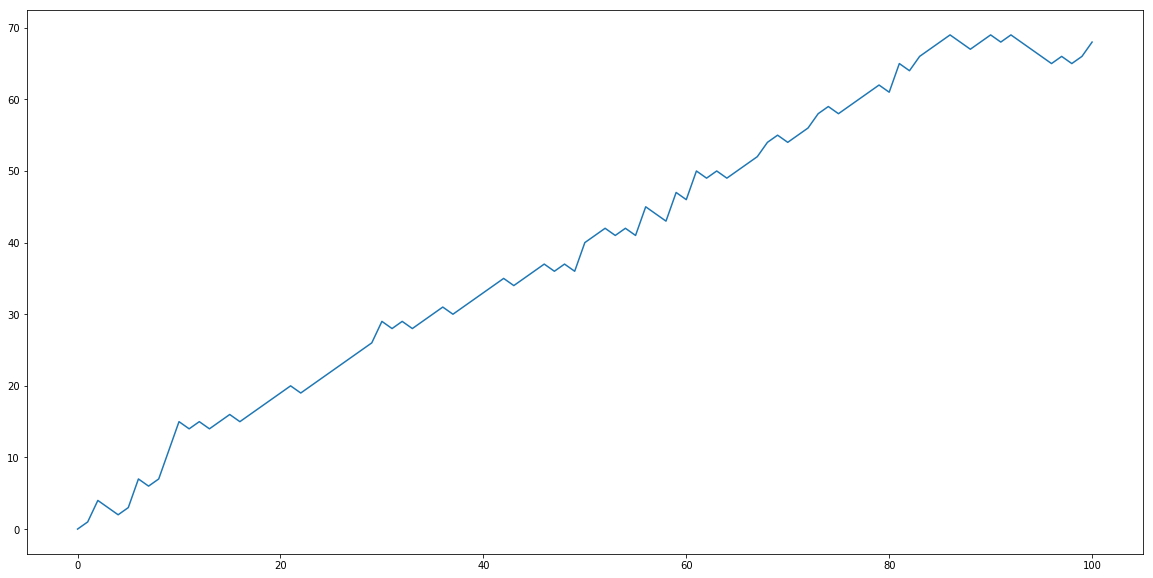

In [3]:
# Initialization
np.random.seed(99)

# Initialize all_walks
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = step - 1
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)


#print(all_walks)

# Plot random_walk
plt.figure(figsize=(20,10))
plt.plot(random_walk)

# Show the plot
plt.show()

We generate a simulate 100 random walks. The np.random.seed of 99 is being used that let the reader reproduce the same results. Because we are using the gaussian random generator of integers the walk will be gaussian in nature.
<br>
To make thing more interesting we create a basic algorithm, where we though a dice and depending on the result we move with a particular number of steps. We get the number of step from the previous iteration of the for cycle. The steps are decreased with 1 if the dice is less or equal then 2, if there are between 3 and 5 we increase the number of steps with 1, and if we get 6 we increase the number of steps with a random number between 1 and 4. Finally the values of the random walk are printed (optionally, it is commented out) and plotted.  
<br>
We seem mostly a increasing trend.

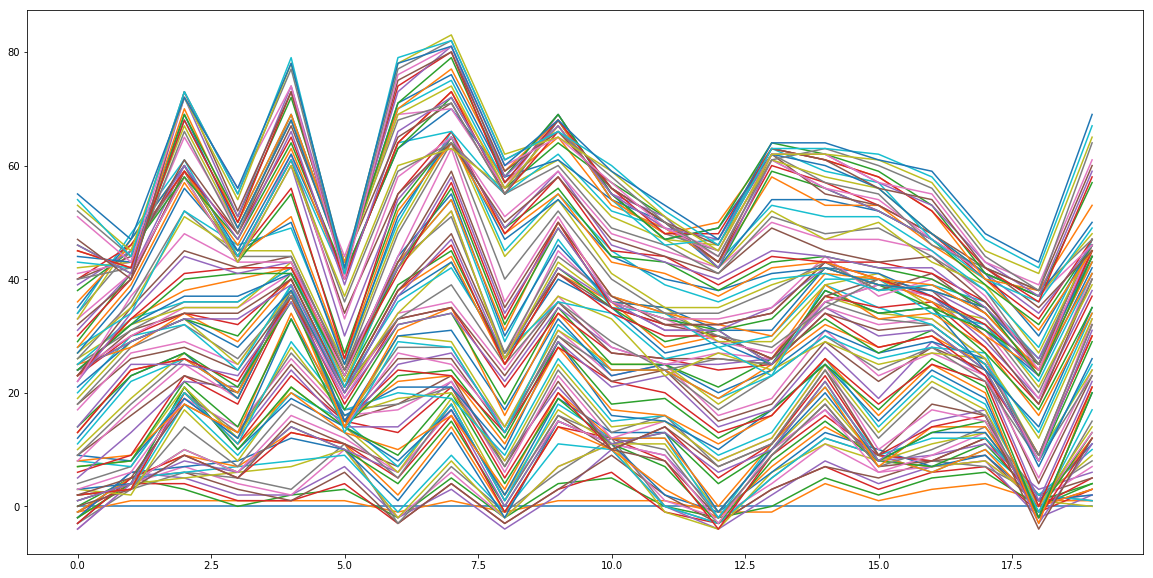

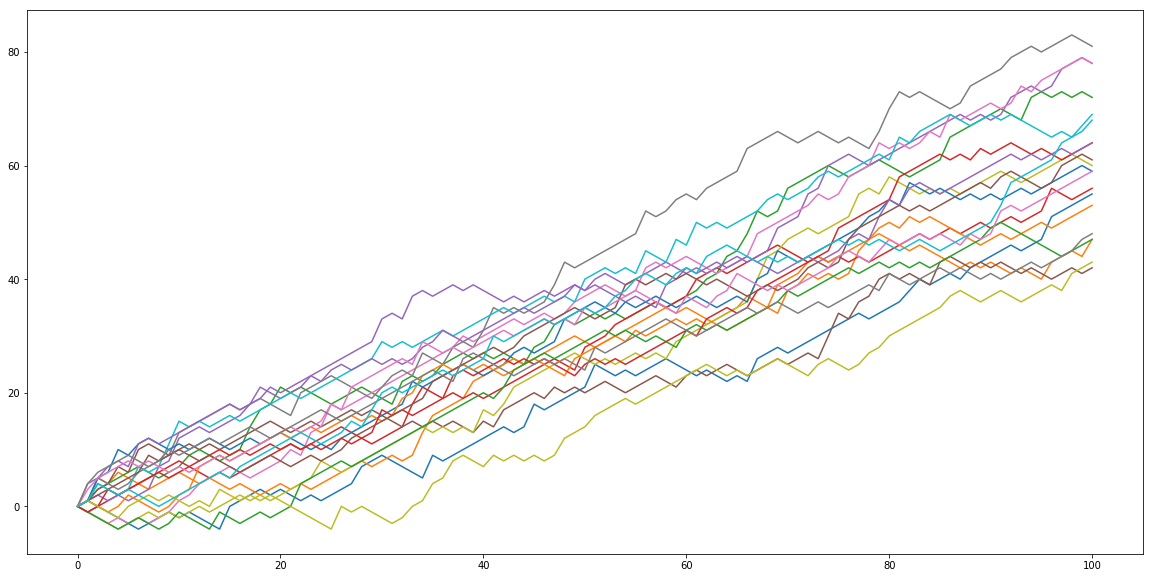

In [4]:
np.random.seed(99)
all_walks = []
for i in range(20) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = step - 1
        elif dice <= 5 and dice > 2:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        random_walk.append(step)
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.figure(figsize=(20,10))
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.figure(figsize=(20,10))
plt.plot(np_aw_t)
plt.show()

We start with 20 walks. The graphs are much clearer then with 500 walks below. Most paths follow and increasing trend.

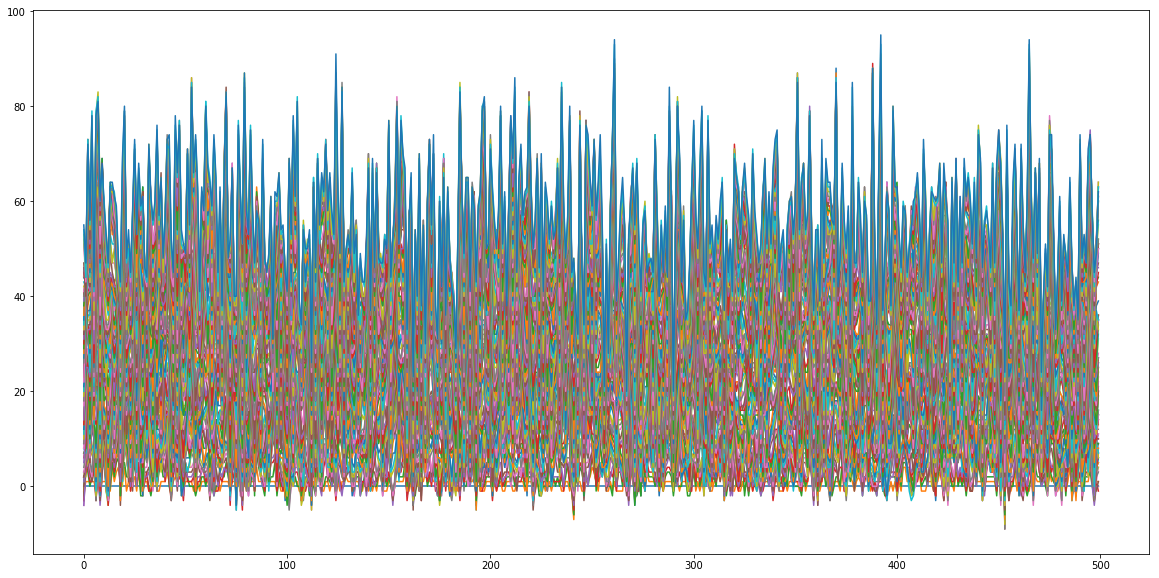

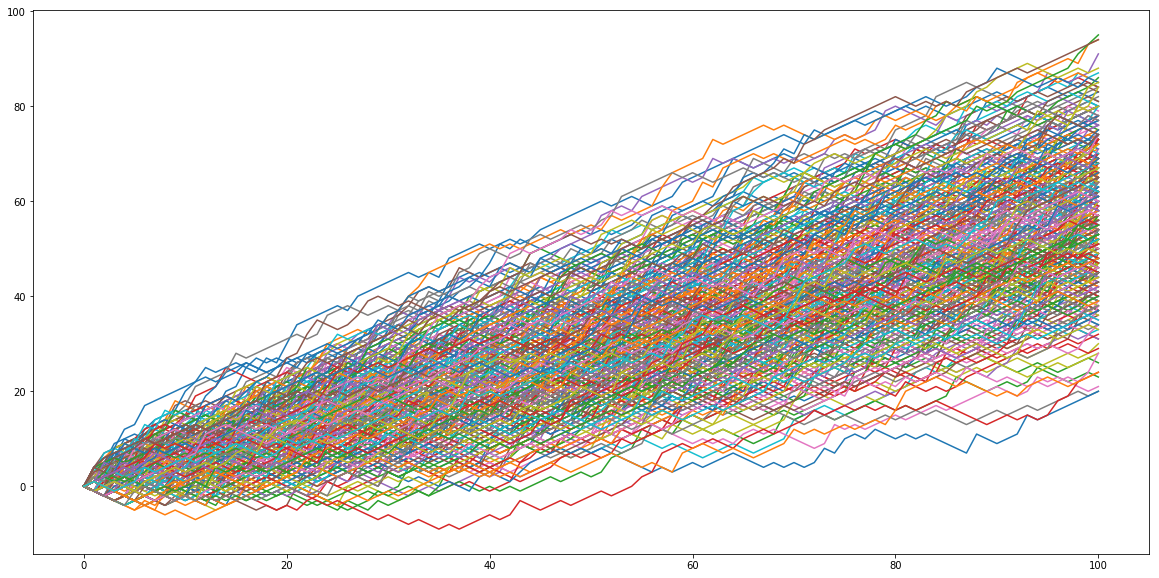

In [5]:
np.random.seed(99)
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = step - 1
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,5)
        random_walk.append(step)
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.figure(figsize=(20,10))
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.figure(figsize=(20,10))
plt.plot(np_aw_t)
plt.show()

Now we will scale the simulation increasing the number of walks to 500. The walks have been plotted. With so many simulations so the graph is very dense and not very informative, but the Law of Large Numbers is set to apply now.
<br>
The trends are again mostly increasing.

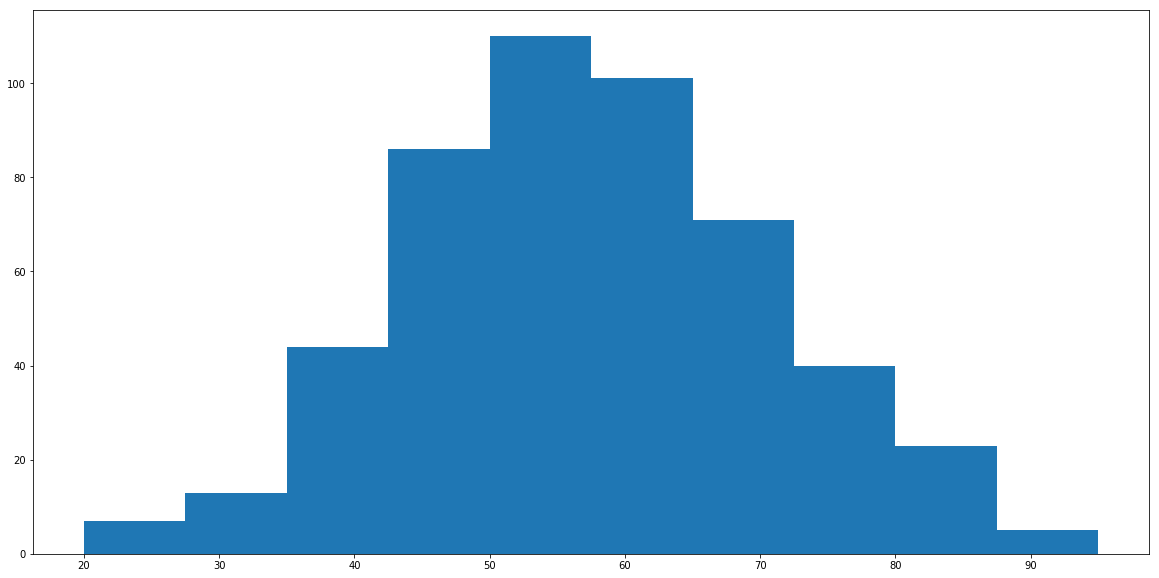

The odds of the ending point being above 40 is 91.00%


In [6]:
# Select last row from np_aw_t: ends
ends = np_aw_t[-1]

# Plot histogram of ends, display plot
plt.figure(figsize=(20,10))
plt.hist(ends)
plt.show()

#lets caclulate the odds of the ending point being above 40
bool = ends >= 40
greater = sum(bool)
print("The odds of the ending point being above 40 is " + "{:0.2%}".format(greater / 500))

We define and ending point of the process, when all the walks are over with the variable ends. It has been plotted and is showing close to the normal distribution, although it seem some asymmetric to the left. At the end we calculate the odds of having and ending point more then 90 which is 20,40%. (this can be done for other percentages).

### Brownian Motion or Wiener Process
Both names are used to describe the process. It was first discovered by biologist Robert Brown (1773 - 1858) studying the particle movements under a microscope. However it was mathematically describer by Norbert Wiener (1894 - 1964). The process is a continuous-time stochastic process and a subset of the Levy Process. Martingales are derived from the process. 
<br>
Lets represent the process with $W_{t}$, with the t index as the time.
1. It starts with 0 or $W_{0}$ = 0.
<br>
2. The increments are independent from the past values $W_{t + u} - W_{t}$ for u > s > 0 are independent form $W_{s}$.
<br>
3. The increments have normal distribution $W_{t + u} - W_{t}$ $\sim N(O,u)$
<br>
4. W has a.s. continuous path.
<br>
Some of the basic properties are:
<br>
The mathematical expectation is 0 or $E(W_{t}) = 0$.
<br>
The variance is 0 or $Var(W_{t}) = t$
<br>
The covariance is $cov(W_{s}, W_{t}) = min(s, t)$
<br>
The correlation is $corr(W_{s}, W_{t}) = \frac{min(s, t)}{\sqrt{st}}$
<br>
It can be further altered if we add an additional drift to show changes in a certain direction.
<br>
It is used to model white noise, also has major influence for fluid mechanics, quantum mechanics and the Black-Scholes option pricing model (which is not correct in every case).

In [7]:
# Brownian Motion steps
for i in range(0, 50):
    xt = 0 + norm.rvs(scale=1**2* 4)
    #print(xt)

Now we generate 50 values for $x_{t}$. It is comment out. If the reader wants to see the print statement can uncomment it.

In [8]:
def generate_brownian(x0, n, dt, delta, output=None):
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta* np.sqrt(dt))
    if output is None:
        output = np.empty(r.shape) 
        
    np.cumsum(r, axis=-1, out = output)
    output += np.expand_dims(x0, axis=-1)

    return output

The Generate_Brownian Function is defined, with inputs $x_{0}$, $n$, $d_{t}$ and $delta$. The $x_{0}$ = 0 and the formula is: $$X(t+dt)=X(t) + N(0,(delta)^2 dt;t,t+dt) $$

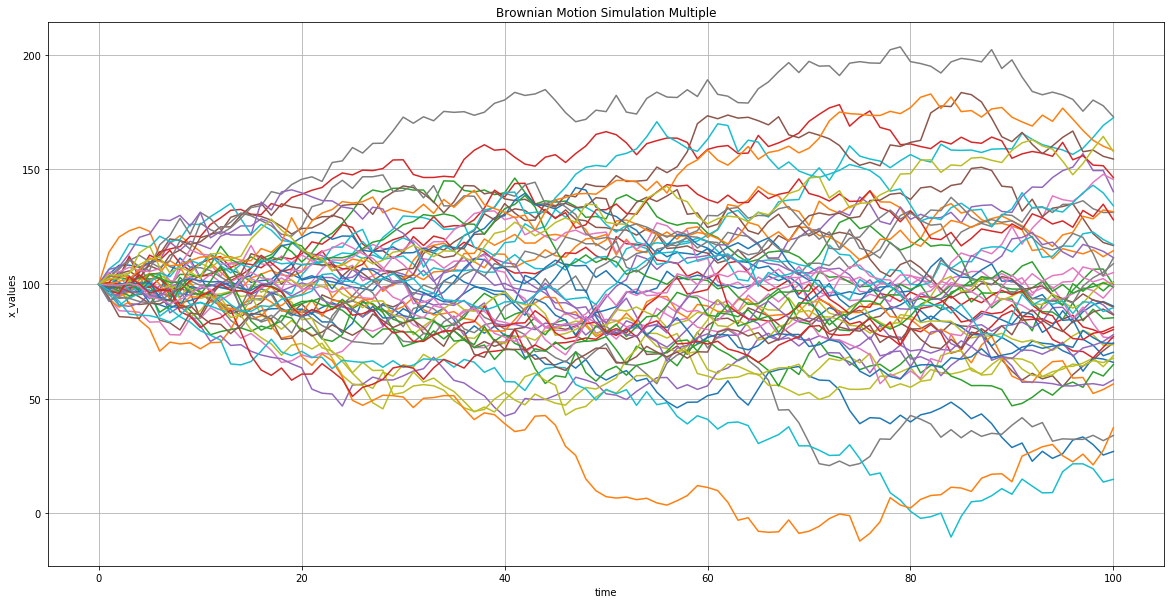

In [9]:
x = np.empty((50,101))
x[:, 0] = 100

generate_brownian(x[:, 0], 100, 1, 4, output=x[:,1:])

time = np.linspace(0, 100, 101)
plt.figure(figsize=(20,10))
for k in range(50):
    plt.plot(time, x[k])
plt.title('Brownian Motion Simulation Multiple')
plt.xlabel('time')
plt.ylabel('x_values')
plt.grid(True)
plt.show()

Finally we plot the 50 simulations, we start with $x_{0}$ = 100 and go on for 100 periods. Most simulations stay close to the baseline of 100, but some stray further away.

### Poisson Process
The Poisson Process is named after the French mathematician Simon Poisson (1781 - 1840). We define a Poisson Process as random process when it satisfies the following conditions:
<br>
1. The first value is 0 or $X(0) = 0$.
<br>
2. The increments are independent. This is also named lack of memory or Markov Property, meaning the the Markov Process is more general.
<br>
3. The probabilities of x = k follows the poisson distribution (a type of discrete probability distribution) with a probability mass function for k = 0, 1, 2 ...: $$P(X = k) = \frac{\lambda ^ k e^{-\lambda}}{k!}$$
The distribution can be visualized in the following picture. Lambda is also known as an intensity. The higher the lambda the more symmetric the distribution.

<img src="Poisson.png" style="max-height: 230px" />

Some examples of applications are queueing theory for arrival of customers at a shop, trees in forests, subatomic particles smashing in a particle accelerator or getting calls from a telephone network.

Now we define the poisson_process function with 2 arguments lambdas and number. The lambdas show different intensities, while the number is the time periods that are generated. We will check different outcomes. The output is generated following this function: $$X(t) = X_{0} + \sum_{k = 1}^{t} X_{k}$$

In [23]:
def poisson_process(lambdas, number):
    X_T = np.random.poisson(lambdas, size=number)
    S = [np.sum(X_T[0:i]) for i in range(number)]
    plt.figure(figsize=(20,10))
    X = np.linspace(0, number, number)
    graphs = [plt.step(X, S, label="Lambda = %d"%lambdas)[0] for i in range(lambdas)]
    graph = plt.step(X, S, label="Lambda = %d"%lambdas)
    plt.legend(handles=graph, loc=2)
    plt.title('Poisson Process')
    plt.xlabel('time')
    plt.ylabel('intensity')
#The legend does not display perfectly so the parameters have been split.

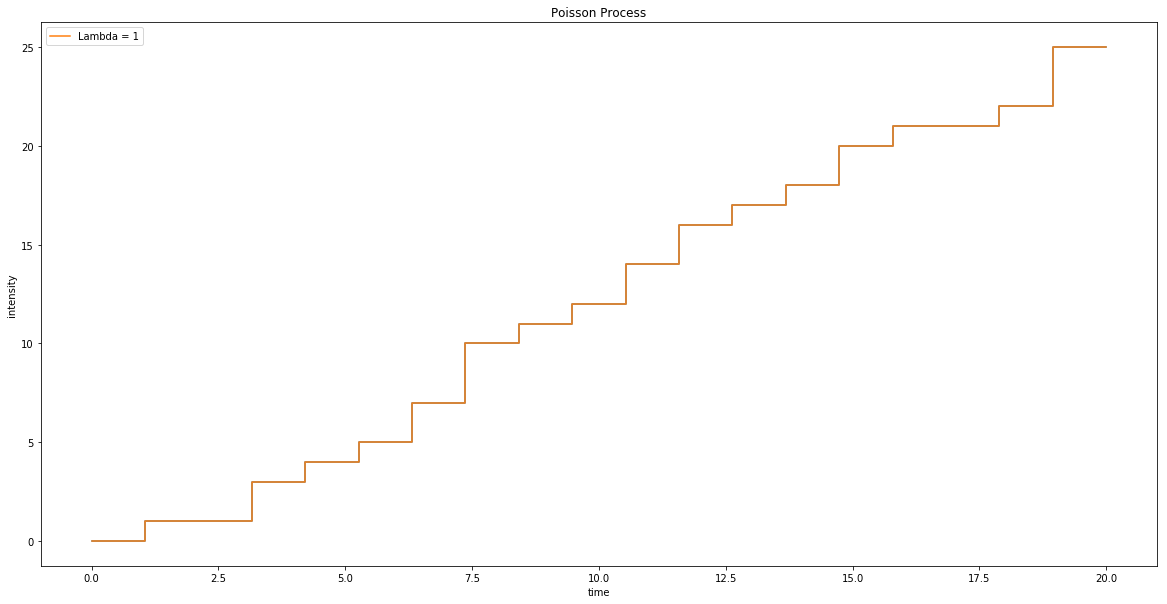

In [24]:
poisson_process(1, 20)
plt.show()

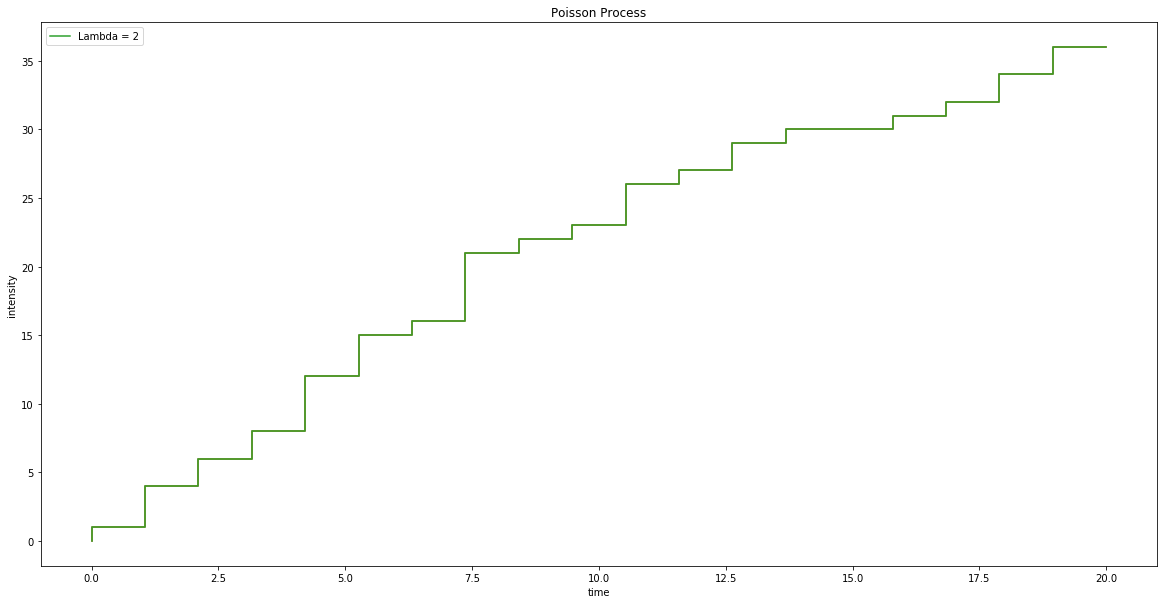

In [25]:
poisson_process(2, 20)
plt.show()

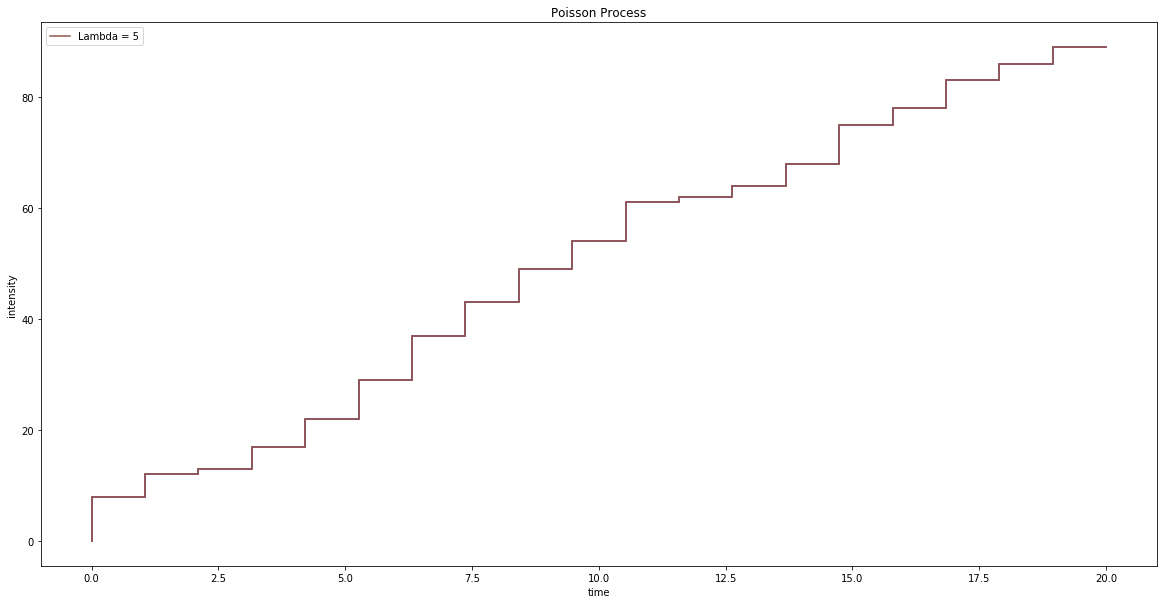

In [26]:
poisson_process(5, 20)
plt.show()

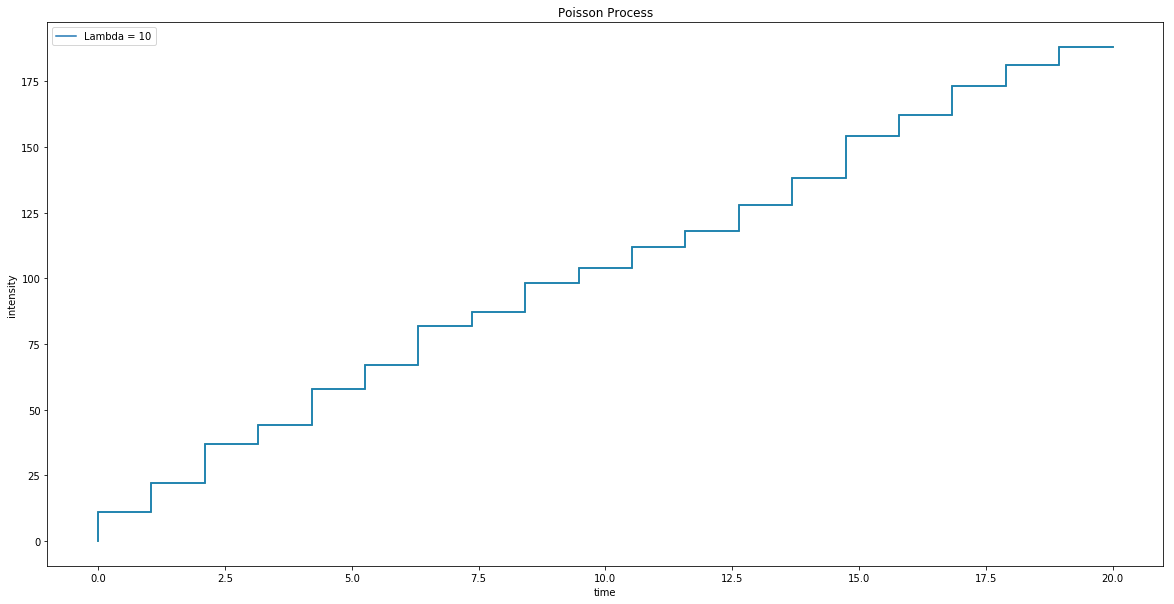

In [27]:
poisson_process(10, 20)
plt.show()

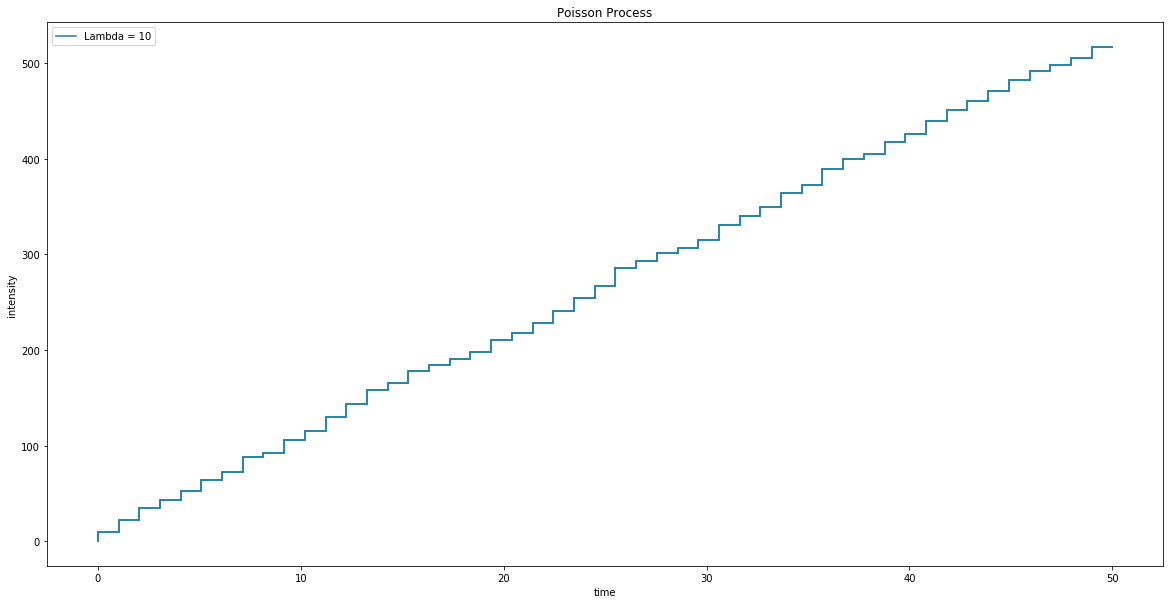

In [28]:
poisson_process(10, 50)
plt.show()

After generating the process we get several stepping functions. We can see that the higher the intensity the higher the values reached, same can be said for the time. The higher the intensity the higher the steps.

### Markov Chains
The Markov Chain is named after the Russian mathematician Andrey Markov (1856 - 1922). A Markov Chain is defined as a stochastic process that posses the Markov Property. We have a process that moves from one state to another, the new state depends only on the current position and not on the historical positions. This is also known as memoryless. This is a discrete time process, the alternative for a continuous type is a Markov process. The change of positions can be represented with a transition matrix.
<br>
It should be notes that the Weiner process and the Poisson Process are a subset of the Markov Process. 
<br>
Some of examples of the use are modeling the price of an asset, the temperature, the change of the landscape height above sea level, population growth, currency rates exchange rate (like cryptocurrencies for example), PageRank is based on Markov Process.  https://en.wikipedia.org/wiki/PageRank
<br>
To better visualize the process you can view this graph.


<img src="Markov.png" style="max-height: 230px" />

In the image we start from the original state $S_{0}$ more with a probability to $S_{1}$ then with a probability 20% from $S_{2}$ and with 80% probability to $S_{3}$. There could be several paths to one state for example $S_{4}$. There could also be periodicity and recurrence of one state.

In [16]:
# Different States
states = ["Rise","Fall","Static"]

# Possible sequences of events
transitionName = [["SS","SR","SF"],["RR","RS","RF"],["FR","FS","FF"]]

# Transition matrix
transitionMatrix = [[0.2,0.6,0.2],[0.15,0.5,0.35],[0.05,0.55,0.4]]

This is an example for a Markov Chain, where 'R' stands for Rise, 'F' for Fall, and 'S' for Static. Double big letters represent the probability of moving from the first to the second position.
The possible probabilities stated in the transition matrix are just and example and can be changed at any time.

In [17]:
if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
    print("Error! The probablilities for every position must be 1")

Lets check the sum of the probabilities in the transition matrix must equal 1, or else there will be an error.

In [18]:
def activity_forecast(hours):
    # Lets start with Static State
    activityNow = "Static"
    print("Start state: " + activityNow)
    activityList = [activityNow]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != hours:
        if activityNow == "Static":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Static")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityNow = "Rise"
                activityList.append("Rise")
            else:
                prob = prob * 0.2
                activityNow = "Fall"
                activityList.append("Fall")
        elif activityNow == "Rise":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.15
                activityList.append("Rise")
                pass
            elif change == "RS":
                prob = prob * 0.5
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.35
                activityNow = "Fall"
                activityList.append("Fall")
                "FR","FS","FR"
        elif activityNow == "Fall":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "FR":
                prob = prob * 0.05
                activityNow = "Static"
                activityList.append("Rise")
                pass
            elif change == "FS":
                prob = prob * 0.55
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.4
                activityNow = "Fall"
                activityList.append("Fall")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(hours) + " hours: " + activityNow)
    print("Probability of the possible sequence of states: " + str(prob))

#Forcast for the next 5 hours
activity_forecast(5)

Start state: Static
Possible states: ['Static', 'Rise', 'Fall', 'Fall', 'Fall', 'Static']
End state after 5 hours: Static
Probability of the possible sequence of states: 0.018480000000000003


We define the activity_forecast function with the argument hours to start the simulation. The beginning state is set to 'Static'. An if-else conditional statement is used to generate different outcomes. Finally we generate a simulation for 5 periods in the future and the probability of fallowing this particular path.

In [19]:
def activity_forecast(hours):
    activityNow = "Static"
    activityList = [activityNow]
    i = 0
    prob = 1
    while i != hours:
        if activityNow == "Static":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Static")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityNow = "Rise"
                activityList.append("Rise")
            else:
                prob = prob * 0.2
                activityNow = "Fall"
                activityList.append("Fall")
        elif activityNow == "Rise":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.15
                activityList.append("Rise")
                pass
            elif change == "RS":
                prob = prob * 0.5
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.35
                activityNow = "Fall"
                activityList.append("Fall")
                "FR","FS","FR"
        elif activityNow == "Fall":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "FR":
                prob = prob * 0.05
                activityNow = "Static"
                activityList.append("Rise")
                pass
            elif change == "FS":
                prob = prob * 0.55
                activityNow = "Static"
                activityList.append("Static")
            else:
                prob = prob * 0.4
                activityNow = "Fall"
                activityList.append("Fall")
        i += 1    
    return activityList

list_activity = []
count = 0

for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))
  
print(list_activity[0:5])
#we can view the first 5 outputs

[['Static', 'Static', 'Static'], ['Static', 'Static', 'Fall'], ['Static', 'Static', 'Static'], ['Static', 'Rise', 'Fall'], ['Static', 'Static', 'Static']]


Now we used a similar example to test 10000 iterations. Now we will apply the Law of Large Numbers to get the probability of starting from a position of Static to a positions of Rise and Fall.

In [20]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Rise"):
        count += 1
        
#what is the probability of starting with static and ending with Rise.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Rise'= " + str(percentage) + "%")

The probability of starting at state:'Static' and ending at state:'Rise'= 21.7%


In [21]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Fall"):
        count += 1
        
#what is the probability of starting with static and ending with Fall.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Fall'= " + str(percentage) + "%")

The probability of starting at state:'Static' and ending at state:'Fall'= 55.38999999999999%


In [22]:
for smaller_list in list_activity:
    if(smaller_list[2] == "Static"):
        count += 1
        
#what is the probability of starting with static and ending with Static.
percentage = (count/10000) * 100
print("The probability of starting at state:'Static' and ending at state:'Static'= " + str(percentage) + "%")
#There is an error it should be 1 - percentage_for_fall - percentage_for_rise

The probability of starting at state:'Static' and ending at state:'Static'= 99.99%


The code above should be run only once or else it will increase above 100% witch will not be a realistic assumption. It should be the complement probability to the other two. Meaning  approximately 23 % (1 - 0.55 - 0.22).

### Conclusion
This notebook gave a very short introduction to basic kinds of stochastic processes. In a future work more processes can be added to the notebook. For an example a Bernuli Process, Levy Process, Markov Process, Gamma Process, Birth Process or even Branching processes. It should also be notes that there are several variations of the used examples. A list of the processes can be viewed here: (https://en.wikipedia.org/wiki/List_of_stochastic_processes_topics).
<br>
Other topics such as stopping times, recurrency, periodicity and other behaviors have also been excluded.
<br>
It should be noted that a more mathematically rigorous approached can be taken, for example no martingales have been used.
The Point of this is for the general reader without much mathematical knowledge. 


### References
1. https://fromosia.wordpress.com/2017/03/19/stochastic-poisson-process/
2. https://fromosia.wordpress.com/2017/03/09/stochastic-process/
3. https://www.datacamp.com/community/tutorials/markov-chains-python-tutorial
4. https://www.wikipedia.org/
5. https://www.datacamp.com
6. http://scipy-cookbook.readthedocs.io/items/BrownianMotion.html